# LAB #1 Question 3a
In this notebook, we are trying to add a layer to the 2 layer fully connected network from the previous part.



In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [0]:
tf.__version__

'1.15.0'

## Load Data

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
len(data.train.images) # Train image count

55000

In [0]:
len(data.test.images) # Test image count

10000

### One-Hot Encoding

In [0]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [0]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [0]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

### Data dimensions

In [0]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Plot a few images to see if data is correct

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


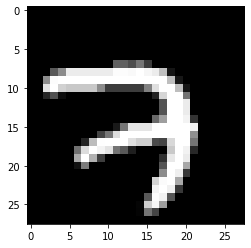

In [0]:
# Sample to plot
sample = 0

# Reshape sample from 784 to 28x28
reshaped_sample = np.reshape(data.train.images[sample], newshape=(28,28)) 

# Plot reshaped sample image using grayscale color map
plt.imshow(reshaped_sample, cmap="gray") 

# Print true sample class
print (data.train.labels[sample]) 

### Placeholder variables

In [0]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [0]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [0]:
y_true_cls = tf.placeholder(tf.int64, [None])

### Variables to be optimized

The variables that will be optimized are declared here. As there are three layers in this network, there will be 3 weight and 3 bias matrices, whose sizes change based on the input units and output units. The neuron numbers of the first two layers are parametrized with the variables **neurons1** and **neurons2**. For the sake of the experiment, both of the neuron numbers were given 1000 to see the difference from the two layer network with the hidden layer having 1000 neurons.

Note that the variable are initilized with values from random normal distribution. The reason for this is that the model is not initilized with proper values unless specified. Without the initializations, the model cannot learn weights during the training session and predict the same class over and over again for all the inputs.



In [0]:
neurons1 = 1000
neurons2 = 1000
weights1 = tf.Variable(tf.random_normal([img_size_flat, neurons1], mean=0, stddev=2))
weights2 = tf.Variable(tf.random_normal([neurons1, neurons2], mean=0, stddev=2))
weights3 = tf.Variable(tf.random_normal([neurons2, num_classes], mean=0, stddev=2))


biases1 = tf.Variable(tf.random_normal([neurons1], mean=0, stddev=1))
biases2 = tf.Variable(tf.random_normal([neurons2, mean=0, stddev=1))
biases3 = tf.Variable(tf.random_normal([num_classes], mean=0, stddev=1))

# Model
The network is 3 layered and there are activations at end of each layer. ReLU was used as the activation function of the hidden layers and softmax was used for the output layer.

The hidden layers are defined as **y1** and **y2** and the output layer is defined as **logits**, which is then put under argmax operation which will give the final prediction.

In [0]:
y1 = tf.matmul(x, weights1) + biases1
y1 = tf.nn.relu(y1)
y2 = tf.matmul(y1, weights2) + biases2
y2 = tf.nn.relu(y1)
logits = tf.matmul(y2, weights3) + biases3 

In [0]:
y_pred = tf.nn.softmax(logits)

In [0]:
y_pred_cls = tf.argmax(y_pred, axis=1)

### Cost-function to be optimized

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
cost = tf.reduce_mean(cross_entropy)

### Optimization method
For the sake of experiment, this part was added to qucickly try different optimization methods. The learning rate can be changed with **lr** and the optimization method can be changed with **opt**.

In [0]:
lr = 0.05
opt = "Gradient Descent"
#opt = "Adam"
if opt == "Gradient Descent":
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)
else: 
  optimizer = tf.train.AdamOptimizer().minimize(cost)

### Performance measures

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## TensorFlow Run

### Create TensorFlow session

Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph.

In [0]:
session = tf.Session()

In [0]:
start_time=time.time()
init = tf.initialize_all_variables()
session.run(init)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


### Train

In [0]:
batch_size = 1000

In [0]:
accuracy_on_iteration = []

In [0]:
def train(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        save_accuracy()
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

### Test

In [0]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}


In [0]:
accuracy_on_iteration = []

In [0]:
def print_accuracy():
    
    # Run the model to get predictions for test data
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    
    # Get true labels
    cls_true = data.test.cls
    
    # Calculate the difference betweeb predictions and true labels
    correct_prediction = np.equal(cls_pred, cls_true)
    
    # Calculate the total accuracy
    acc = np.mean(correct_prediction)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))
    return acc

In [0]:
def save_accuracy():
    
    # Run the model to get predictions for test data
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    
    # Get true labels
    cls_true = data.test.cls
    
    # Calculate the difference betweeb predictions and true labels
    correct_prediction = np.equal(cls_pred, cls_true)
    
    # Calculate the total accuracy
    acc = np.mean(correct_prediction)

    # Print the accuracy.
    accuracy_on_iteration.append(acc)

In [0]:
print_accuracy()

Accuracy on test-set: 10.2%


0.1025

In [0]:
train(num_iterations=1)

In [0]:
print_accuracy()

Accuracy on test-set: 16.0%


0.1603

## Performance after 10 training iterations

In [0]:
# We have already performed 1 iteration.
train(num_iterations=9)

In [0]:
print_accuracy()

Accuracy on test-set: 56.4%


0.5636

In [0]:
# We have already performed 10 iterations.
train(num_iterations=990)

In [0]:
final_acc = print_accuracy()

Accuracy on test-set: 91.9%


## Confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap="Blues")

[[ 939    0    6    3    1   12    9    4    1    5]
 [   0 1100    5    5    1    2    3    5   12    2]
 [   6    5  931   28    9    9    9   12   20    3]
 [   3    3   17  925    1   22    2   11   17    9]
 [   2    2   10    4  896    2    6    8   11   41]
 [   4    1    7   34    4  801   10    7   17    7]
 [  14    2   11    1   10   22  882    1    9    6]
 [   1    8   26   22    4    2    1  929    4   31]
 [   5    2   13   21    6   27    9   11  865   15]
 [   5    7    2    9   30   10    0   10   14  922]]


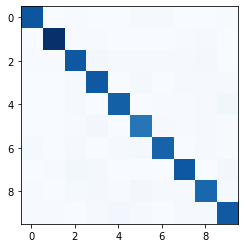

In [0]:
print_confusion_matrix()

In [0]:
session.close()
end_time = time.time()

## Accuracy Graph and Elapsed Time

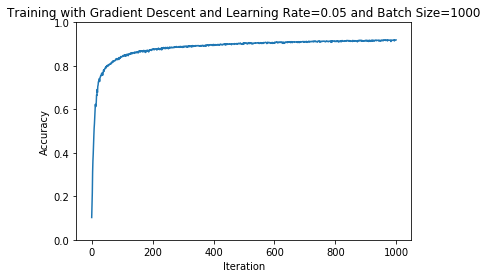

Accuracy on test-set: 91.9%
Time taken: 18.701510190963745


In [0]:
plt.plot(accuracy_on_iteration)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.ylim(top=1.0, bottom=0.0)
if opt == "Adam":
  plt.title("Training with {} and Batch Size={}".format(opt, str(batch_size)))
else:
  plt.title("Training with {} and Learning Rate={} and Batch Size={}".format(opt, str(lr), str(batch_size)))
plt.show()
print("Accuracy on test-set: {0:.1%}".format(final_acc))
print("Time taken: {}".format(str(end_time - start_time)))


## References

[1] [Magnus Erik Hvass Pedersen](http://www.hvass-labs.org/)